In [355]:
import pandas as pd
import numpy as np
%matplotlib inline

In [356]:
movies = pd.read_csv('movies_metadata.csv')

#remove columns we are not interested in
movies = movies.drop(columns=['adult', 'popularity', 'belongs_to_collection', 'original_language', 'poster_path', 'original_title', 'production_companies', 'homepage', 'id', 'imdb_id', 'overview', 'spoken_languages', 'status', 'tagline', 'video'])

C:\Users\CodeGirl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [357]:
#the budgets is string type, but we want them as integers

budget_int = []
for index, row in movies.iterrows():
    budget = row['budget']
    #check for numerical strings
    if(budget.isdigit()):
        #convert numerical strings to ints
        budget_int.append(int(budget))
    else:
        #we cannot use non-numerical strings (likely data entry error) as budget, so drop invalid rows
        movies.drop(index, inplace=True)

movies['budget'] = budget_int

In [358]:
#assume that if budget, revenue, or vote count is 0, there is no data for it
#so drop those rows
movies = movies[movies.vote_count > 0]
movies = movies[movies.budget > 0]
movies = movies[movies.revenue > 0]

In [359]:
#there are a some movies in the dataset with suspiciously low budgets (ranging from 0-2500)
#we assume any entry of 0 is incorrect.
#by checking some of the movie titles that have >0 budget with other sources across the internet, they appear to be incorrect.
#to be safe, we will remove every movie with a budget lower than the lowest correct budget
movies = movies[movies.budget > 2500]

#likewise, there are a some movies in the dataset with suspiciously low revenue (ranging from 0-388)
movies = movies[movies.budget > 388]

#there are also some movies with suspiciously low vote counts
#I'm not sure how low is "too low."
#any movie with 0 votes should not be used.
#but there are movies with only 1 or 2 votes, which isn't enough data
#for now, remove all movies with vote counts lower than half the mean?
movies = movies[movies.vote_count >= np.mean(movies['vote_count'])/2]

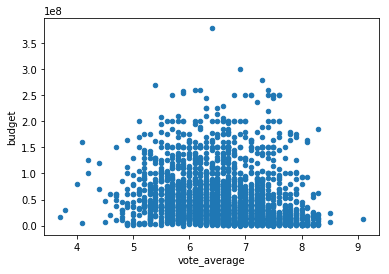

In [360]:
movies.plot(x='vote_average', y='budget', kind='scatter')

# Noteworthy things?:
- some of the highest-rated movies have relatively low budgets, but there are very few of these.
- seems to follow normal distribution: spending a relatively high amount only gets average rating
- there is a noticable number of movies that have high budget but ended up with low ratings lol

In [361]:
#curious about the lowest-rated movies
movies.sort_values('vote_average').head(20)

,budget,genres,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
24413,16000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-03,19682924.0,110.0,Left Behind,3.7,396.0
12358,30000000,"[{'id': 35, 'name': 'Comedy'}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2008-01-24,84646831.0,84.0,Meet the Spartans,3.8,370.0
18101,79000000,"[{'id': 35, 'name': 'Comedy'}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2011-11-11,149673788.0,91.0,Jack and Jill,4.0,619.0
28207,4000000,"[{'id': 53, 'name': 'Thriller'}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-01-23,52425855.0,91.0,The Boy Next Door,4.1,1034.0
1486,160000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-06-13,164508066.0,121.0,Speed 2: Cruise Control,4.1,439.0
1491,125000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1997-06-20,238207122.0,125.0,Batman & Robin,4.2,1447.0
7939,100000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-07-22,82102379.0,104.0,Catwoman,4.2,833.0
23110,70000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-01-10,61279452.0,99.0,The Legend of Hercules,4.4,542.0
26563,120000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-08-05,167977596.0,100.0,Fantastic Four,4.4,2322.0
20314,6000000,"[{'id': 35, 'name': 'Comedy'}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2013-01-01,32438988.0,90.0,Movie 43,4.5,816.0


In [362]:
#and what is the overall average rating given to movies in this data set?
np.mean(movies['vote_average']) #aligns with the way the scatter plot looks

6.570567685589526

In [363]:
#fixing the genre column. Originally they appear to be lists but are actually strings.
#make them into actual list objects

#The pattern: genre names appear after name': ' and before '}
start= "name': '"
end="'}"

#i want to keep count of all the genres that occur
all_movie_genres = []

#use for reformatting the dataframe
movie_genres = []

for index, row in movies.iterrows():
    genre_string = row['genres']

    genres = []
    #extract the genre string based on the pattern
    while(start in genre_string):
        genre = genre_string[genre_string.find(start)+(len(start)):genre_string.find(end)]

        if(len(genre_string) > 0):
            genres.append(genre)
            all_movie_genres.append(genre)
            
        genre_string = genre_string[genre_string.find(start)+len(genre):]
    movie_genres.append(genres)

#now it's more readable
movies['genres'] = movie_genres
movies

,budget,genres,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,30000000,"[Animation, , Comedy, , Family]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,3.735540e+08,81.0,Toy Story,7.7,5415.0
1,65000000,"[Adventure, , Fantasy, , Family]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,2.627972e+08,104.0,Jumanji,6.9,2413.0
5,60000000,"[Action, , Crime, , Drama, , Thriller]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,1.874368e+08,170.0,Heat,7.7,1886.0
9,58000000,"[Adventure, , Action, , Thriller]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,3.521940e+08,130.0,GoldenEye,6.6,1194.0
15,52000000,"[Drama, , Crime]","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-11-22,1.161124e+08,178.0,Casino,7.8,1343.0
17,4000000,"[Crime, , Comedy]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-09,4.300000e+06,98.0,Four Rooms,6.5,539.0
18,30000000,"[Crime, , Comedy, , Adventure]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-11-10,2.123855e+08,90.0,Ace Ventura: When Nature Calls,6.1,1128.0
22,50000000,"[Action, , Adventure, , Crime, , Thriller]","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-10-06,3.030307e+07,132.0,Assassins,6.0,394.0
31,29500000,"[Science Fiction, , Thriller, , Mystery]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-29,1.688400e+08,129.0,Twelve Monkeys,7.4,2470.0
33,30000000,"[Fantasy, , Drama, , Comedy, , Family]","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",1995-07-18,2.541349e+08,89.0,Babe,6.0,756.0


In [364]:
#now we can also get a picture of the genres we have in this dataset
genre_counts = dict((i, all_movie_genres.count(i)) for i in all_movie_genres)
genre_counts

{'Animation': 185,
 '': 3989,
 'Comedy': 738,
 'Family': 291,
 'Adventure': 573,
 'Fantasy': 317,
 'Action': 730,
 'Crime': 392,
 'Drama': 907,
 'Thriller': 723,
 'Science Fiction': 370,
 'Mystery': 214,
 'Horror': 242,
 'Romance': 335,
 'History': 86,
 'War': 80,
 'Western': 28,
 'Music': 63,
 'Documentary': 4}

In [373]:
#a function that can extract movies by genre
def get_movies_with_genre(movies, genre):
    indexer = movies['genres'].apply(lambda x: genre in x)
    results = movies.loc[indexer]
    return results

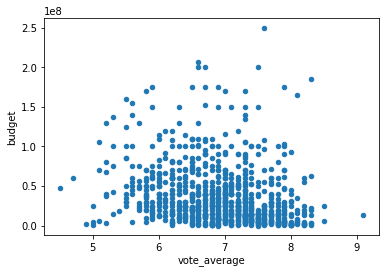

In [374]:
#extracting drama movies, for example
drama = get_movies_with_genre(movies, 'Drama')
#maybe there are difference in budget + rating because different genres require different resources?
drama.plot(x='vote_average', y='budget', kind='scatter')

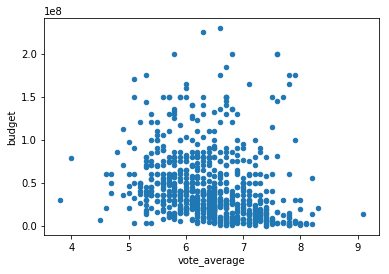

In [375]:
#take a look at comedy
comedy = get_movies_with_genre(movies, 'Comedy')
comedy.plot(x='vote_average', y='budget', kind='scatter')

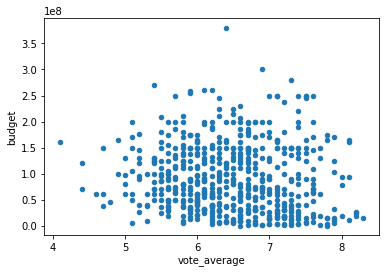

In [376]:
#adventure?
adventure = get_movies_with_genre(movies, 'Adventure')
adventure.plot(x='vote_average', y='budget', kind='scatter')